### Task 1 - Exploratory Data Analysis (EDA)

Data Acquisition & Exploratory Data Analysis (EDA):
- UCI Heart Disease dataset loaded via ucimlrepo
- 14 features selected, missing values handled
- Binary target: presence/absence of heart disease


In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [3]:
from src.data import load_and_prepare_data
import matplotlib.pyplot as plt
import seaborn as sns

df, num_cols, cat_cols = load_and_prepare_data()
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# Basic info and missing values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Converting target 'num' to binary: 0 = no disease, 1 = presence
if 'num' in df.columns:
    df["target"] = (df["num"] > 0).astype(int)
    df.drop(columns=["num"], inplace=True)
else:
    print("Column 'num' not found. Conversion to 'target' might have happened already !")

df["target"].value_counts(normalize=True)

Column 'num' not found. Conversion to 'target' might have happened already !


target
0    0.541254
1    0.458746
Name: proportion, dtype: float64

In [6]:
# Descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


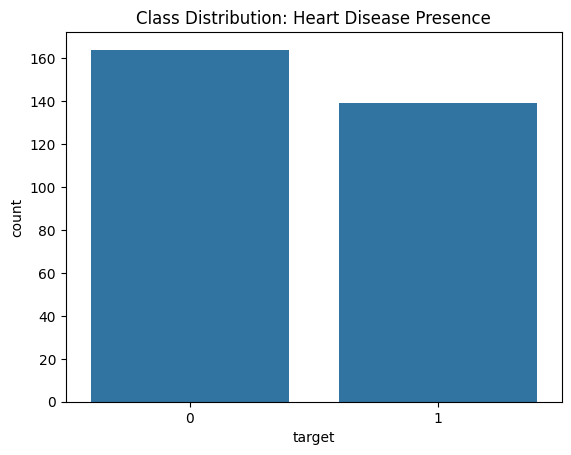

In [9]:
# Class Balance Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Class Distribution: Heart Disease Presence")
plt.savefig("class_distribution.png")
plt.show()

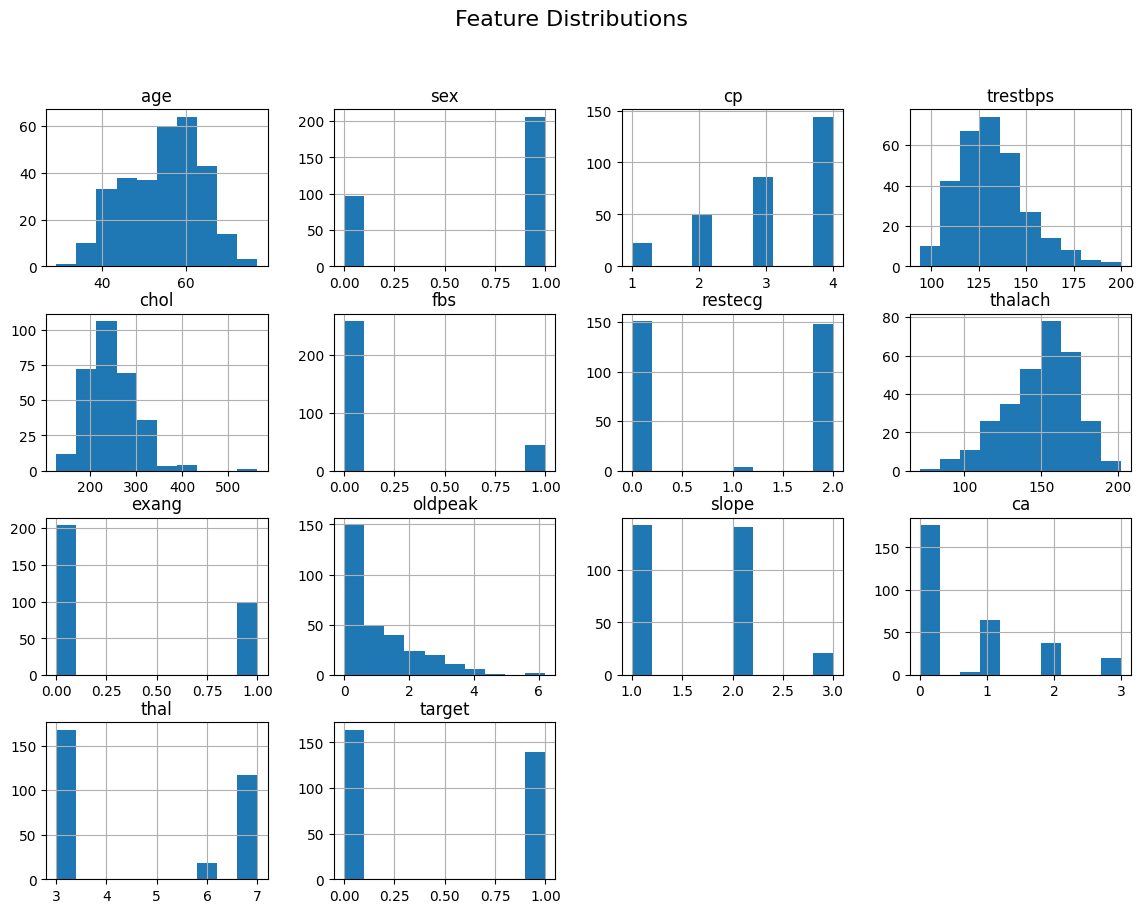

In [10]:
# Univariate Analysis (Histograms)
df.hist(figsize=(14,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig("feature_distributions.png")
plt.show()

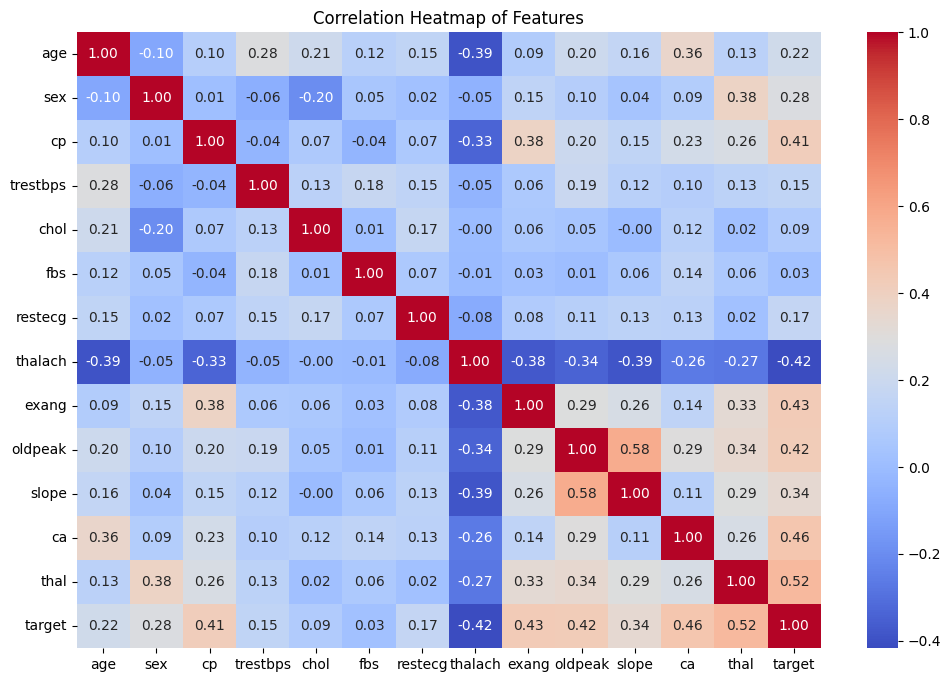

In [11]:
#Feature Correlation Analysis (Heatmap)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.savefig("correlation_heatmap.png", transparent=True)
plt.show()

EDA Summary

Dataset was successfully acquired and cleaned.

Missing values were handled using robust statistical imputation.

Class imbalance was identified and addressed at the evaluation level.

EDA revealed clinically meaningful patterns aligned with known cardiovascular risk factors.

Data is suitable for building interpretable and production-ready ML models.